# EPFL MAP - YEAR 2016

In [1]:
import json
import pickle
import collections
from collections import defaultdict
from BuildGraphModule import *
from UniformData import *
from MultiGraph import *
from AnalysisModule import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('paper.json', 'r') as f:
    data = json.load(f)

In [3]:
# Uniform strings - Authors
data = uniform_authors(data)

In [4]:
# Uniform strings - EPFL Authors
data = uniform_epfl_authors(data)

In [5]:
data_cut = {}
for paper in list(data.keys()):
    try:
        if int(data[paper]['Publication date']) == 2016:
            data_cut[paper] = data[paper]
    except:
        continue

In [6]:
dict_lab_site, dict_labs, dict_labs_paper = lab_dictionaries(data_cut)

In [7]:
# Dictionary (lab, id)
dict_lab_id = {}
for  id_,lab in enumerate(list(dict_labs_paper.keys())):
    dict_lab_id[lab] = id_

In [8]:
# Nodes: labs
nodes = []
for lab in list(dict_labs_paper.keys()):
    nodes += [dict_lab_id[lab]]

In [9]:
# Define edges of the graph: labs that writes papers together
# Dictionary (Lab, dict(lab, publication together))
dict_edges = {}
for lab in list(dict_labs_paper.keys()):
    dict_edges[lab] = defaultdict(list) 
    for lab_2 in list(dict_labs_paper.keys()):
        if lab_2 != lab:
            list_intersection = [p for p in dict_labs_paper[lab] if p in dict_labs_paper[lab_2]]
            if len(list_intersection) != 0:
                dict_edges[lab][lab_2] += list_intersection
            #dict_edges[lab_2][lab] += [p for p in dict_labs_paper[lab] if p in dict_labs_paper[lab_2]]

In [11]:
# Get the list of edges and weigths for the edges
edges = []
weigths = {}
for lab in dict_edges:
    if len(dict_edges[lab]) != 0:
        for lab_2 in dict_edges[lab]:
            edges += sorted([(dict_lab_id[lab], dict_lab_id[lab_2])])
            weigths[(dict_lab_id[lab], dict_lab_id[lab_2])] = len(dict_edges[lab][lab_2])

In [ ]:
# Which are the laboratories which collaborated most in 2016?

# Create the graph

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
G=nx.Graph()

In [14]:
G.add_nodes_from(nodes)

In [15]:
G.add_edges_from(edges)

In [16]:
# Add weights
for i,j in edges:
    G[i][j]['weight'] = weigths[(i,j)]

In [17]:
print (nx.info(G))

Name: 
Type: Graph
Number of nodes: 209
Number of edges: 152
Average degree:   1.4545


In [18]:
spring_pos = nx.spring_layout(G)

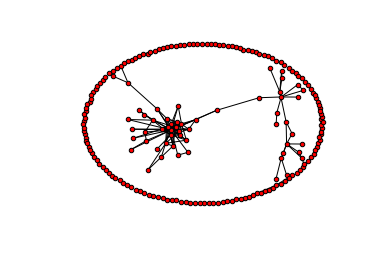

In [19]:
plt.axis('off')
nx.draw_networkx(G, pos = spring_pos, with_labels=False, node_size=20)

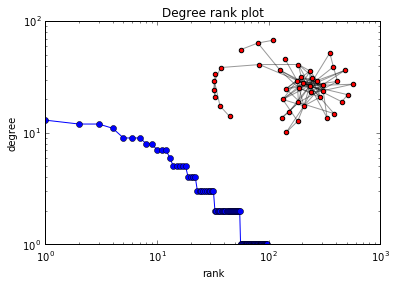

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

degree_sequence=sorted(nx.degree(G).values(),reverse=True) # degree sequence
#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)

plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45,0.45,0.45,0.45])
Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)[0]
pos=nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc,pos,node_size=20)
nx.draw_networkx_edges(Gcc,pos,alpha=0.4)

plt.savefig("degree_histogram.png")
plt.show()

In [104]:
betweeness_sequence=nx.degree_centrality(G)

In [105]:
import operator
sorted_x = sorted(betweeness_sequence.items(), key=operator.itemgetter(1), reverse = True)

In [106]:
sorted_x[:20]

[(47, 0.13461538461538464),
 (120, 0.0625),
 (22, 0.057692307692307696),
 (71, 0.057692307692307696),
 (193, 0.05288461538461539),
 (86, 0.04326923076923077),
 (140, 0.04326923076923077),
 (166, 0.04326923076923077),
 (90, 0.038461538461538464),
 (94, 0.038461538461538464),
 (113, 0.03365384615384616),
 (144, 0.03365384615384616),
 (146, 0.03365384615384616),
 (50, 0.028846153846153848),
 (43, 0.02403846153846154),
 (54, 0.02403846153846154),
 (98, 0.02403846153846154),
 (165, 0.02403846153846154),
 (177, 0.02403846153846154),
 (2, 0.019230769230769232)]

In [107]:
dict_id_lab = {v: k for k, v in dict_lab_id.items()}

In [109]:
dict_id_lab[22]

'Laboratory of Theory and History of Architecture 3'

In [ ]:
# Number of papers two labs pubilsh together